In [1]:
import numpy as np
import pandas as pd
import random
import sklearn.preprocessing as pp

# step01 --> select a data set for training and testing
# data_set=pd.read_csv("C:\\Users\\Ahsan Ghaffar\\Desktop\\Git_AI_Work\\AI & Machine Learning Algorithms\\data anaysis\\Iris.csv", header=None)
data_set=pd.read_csv("Iris.csv")

data_set=data_set.sample(frac=1)
data_set.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica


In [2]:
r_enc = pp.LabelEncoder().fit(data_set['Species'])
data_set['Species']= r_enc.transform(data_set['Species'])

# train_df = train_df.replace(['Setosa', 'Virginica', 'Versicolor'], [0,1,2])

data_set.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,2
40,41,5.0,3.5,1.3,0.3,0
56,57,6.3,3.3,4.7,1.6,1
90,91,5.5,2.6,4.4,1.2,1
145,146,6.7,3.0,5.2,2.3,2


In [3]:
features = data_set.values[:, 1:-1]  #x
labels= data_set.values[: , -1]  # y


train=70
index=int(len(data_set)*int(train)/100) #find last index num for 70% training data

index1=int(len(data_set)*int(20)/100) ## find 20% for validation
index1=index+index1



feature_train=features[0:index,:]
label_train=labels[0:index]

validation_train=features[index:index1,:]
validation_test=labels[index:index1]

feature_test=features[index1:len(data_set),:]
label_test=labels[index1:len(data_set)]

In [4]:
features

array([[6.3, 2.7, 4.9, 1.8],
       [5. , 3.5, 1.3, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.9, 3. , 1.4, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [6.7, 3.3, 5.7, 2.1],
       [6.8, 3. , 5.5, 2.1],
       [6.3, 3.3, 6. , 2.5],
       [7.7, 3. , 6.1, 2.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 2.9, 4.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.4, 1.7, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3

In [5]:
# from sklearn.preprocessing import LabelEncoder
# # encode class values as integers
# le = LabelEncoder()
# encoded_Y = le.fit_transform(y_train)
# encoded_y_train = tf.keras.utils.to_categorical(encoded_Y)
# encoded_Y = le.fit_transform(y_test)
# encoded_y_test = tf.keras.utils.to_categorical(encoded_Y)

In [6]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Input(shape=(4,)),
#   #tf.keras.layers.Dropout(0.001),
#   tf.keras.layers.Dense(8, activation='relu'),
#   tf.keras.layers.Dense(3, activation='softmax')
# ])

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(feature_train, label_train, epochs=200, batch_size=index, validation_data=(validation_train, validation_test))

Train on 105 samples, validate on 30 samples
Epoch 1/200
105/105 [==============================] - 1s 5ms/sample - loss: 1.1201 - accuracy: 0.3048 - val_loss: 1.0619 - val_accuracy: 0.1333
Epoch 2/200
105/105 [==============================] - 0s 143us/sample - loss: 1.0841 - accuracy: 0.1714 - val_loss: 1.0477 - val_accuracy: 0.1333
Epoch 3/200
105/105 [==============================] - 0s 105us/sample - loss: 1.0624 - accuracy: 0.1810 - val_loss: 1.0440 - val_accuracy: 0.1667
Epoch 4/200
105/105 [==============================] - 0s 114us/sample - loss: 1.0474 - accuracy: 0.1714 - val_loss: 1.0362 - val_accuracy: 0.1667
Epoch 5/200
105/105 [==============================] - 0s 105us/sample - loss: 1.0350 - accuracy: 0.1905 - val_loss: 1.0317 - val_accuracy: 0.1667
Epoch 6/200
105/105 [==============================] - 0s 95us/sample - loss: 1.0242 - accuracy: 0.1810 - val_loss: 1.0219 - val_accuracy: 0.1667
Epoch 7/200
105/105 [==============================] - 0s 105us/sample - los

Epoch 57/200
105/105 [==============================] - 0s 95us/sample - loss: 0.7003 - accuracy: 0.8286 - val_loss: 0.7534 - val_accuracy: 0.7667
Epoch 58/200
105/105 [==============================] - 0s 114us/sample - loss: 0.6958 - accuracy: 0.8190 - val_loss: 0.7424 - val_accuracy: 0.8333
Epoch 59/200
105/105 [==============================] - 0s 105us/sample - loss: 0.6914 - accuracy: 0.8286 - val_loss: 0.7441 - val_accuracy: 0.7667
Epoch 60/200
105/105 [==============================] - 0s 105us/sample - loss: 0.6870 - accuracy: 0.8190 - val_loss: 0.7326 - val_accuracy: 0.8333
Epoch 61/200
105/105 [==============================] - 0s 86us/sample - loss: 0.6825 - accuracy: 0.8286 - val_loss: 0.7350 - val_accuracy: 0.7667
Epoch 62/200
105/105 [==============================] - 0s 86us/sample - loss: 0.6781 - accuracy: 0.8190 - val_loss: 0.7224 - val_accuracy: 0.8667
Epoch 63/200
105/105 [==============================] - 0s 114us/sample - loss: 0.6736 - accuracy: 0.8286 - val_los

Epoch 113/200
105/105 [==============================] - 0s 95us/sample - loss: 0.4530 - accuracy: 0.9524 - val_loss: 0.4820 - val_accuracy: 0.9667
Epoch 114/200
105/105 [==============================] - 0s 124us/sample - loss: 0.4492 - accuracy: 0.9238 - val_loss: 0.4662 - val_accuracy: 1.0000
Epoch 115/200
105/105 [==============================] - 0s 105us/sample - loss: 0.4453 - accuracy: 0.9524 - val_loss: 0.4731 - val_accuracy: 1.0000
Epoch 116/200
105/105 [==============================] - 0s 95us/sample - loss: 0.4415 - accuracy: 0.9333 - val_loss: 0.4576 - val_accuracy: 1.0000
Epoch 117/200
105/105 [==============================] - 0s 76us/sample - loss: 0.4377 - accuracy: 0.9524 - val_loss: 0.4641 - val_accuracy: 1.0000
Epoch 118/200
105/105 [==============================] - 0s 114us/sample - loss: 0.4339 - accuracy: 0.9429 - val_loss: 0.4489 - val_accuracy: 1.0000
Epoch 119/200
105/105 [==============================] - 0s 105us/sample - loss: 0.4302 - accuracy: 0.9524 - 

Epoch 169/200
105/105 [==============================] - 0s 133us/sample - loss: 0.2876 - accuracy: 0.9619 - val_loss: 0.2890 - val_accuracy: 1.0000
Epoch 170/200
105/105 [==============================] - 0s 133us/sample - loss: 0.2855 - accuracy: 0.9524 - val_loss: 0.2744 - val_accuracy: 1.0000
Epoch 171/200
105/105 [==============================] - 0s 162us/sample - loss: 0.2833 - accuracy: 0.9619 - val_loss: 0.2838 - val_accuracy: 1.0000
Epoch 172/200
105/105 [==============================] - 0s 143us/sample - loss: 0.2813 - accuracy: 0.9619 - val_loss: 0.2693 - val_accuracy: 1.0000
Epoch 173/200
105/105 [==============================] - 0s 133us/sample - loss: 0.2793 - accuracy: 0.9619 - val_loss: 0.2787 - val_accuracy: 1.0000
Epoch 174/200
105/105 [==============================] - 0s 124us/sample - loss: 0.2773 - accuracy: 0.9619 - val_loss: 0.2644 - val_accuracy: 1.0000
Epoch 175/200
105/105 [==============================] - 0s 114us/sample - loss: 0.2753 - accuracy: 0.9619

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

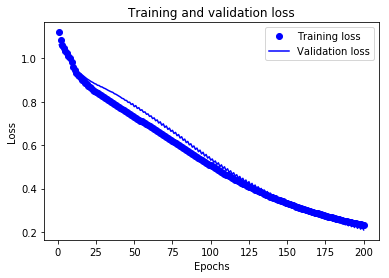

In [12]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

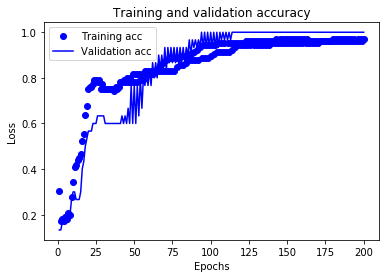

In [11]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
print("Prediction:",model.predict_classes(feature_test[[13]]))
print("Real val:",label_test[13])

Prediction: [2]
Real val: 2.0
